In [24]:
import os
import xarray as xr
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
from windrose import WindroseAxes

repertoire_courant=os.getcwd()
repertoire_figures=repertoire_courant+r"\\"+r"figures"+r"\\"
print(repertoire_courant)
repertoire_fichiers=repertoire_courant+r"\Outputs_EddyPro"+r"\\"
print("chargement des données")
T2_1_2min=xr.open_dataset(repertoire_fichiers+r"T2_RE_bas_2min_full_output.nc")
T2_2_2min=xr.open_dataset(repertoire_fichiers+r"T2_RE_haut_2min_full_output.nc")

T2_1_30min=xr.open_dataset(repertoire_fichiers+r"T2_RE_bas_30min_full_output.nc")
T2_2_30min=xr.open_dataset(repertoire_fichiers+r"T2_RE_haut_30min_full_output.nc")

spectres_1_2min=xr.open_dataset(repertoire_fichiers+r"T2_RE_bas_2min_spectres.nc")
spectres_2_2min=xr.open_dataset(repertoire_fichiers+r"T2_RE_haut_2min_spectres.nc")


spectres_1_30min=xr.open_dataset(repertoire_fichiers+r"T2_RE_bas_30min_spectres.nc")
spectres_2_30min=xr.open_dataset(repertoire_fichiers+r"T2_RE_haut_30min_spectres.nc")

ogives_1_30min=xr.open_dataset(repertoire_fichiers+r"T2_RE_bas_30min_ogives.nc")
ogives_2_30min=xr.open_dataset(repertoire_fichiers+r"T2_RE_haut_30min_ogives.nc")

#correction manuelle pour la direction du vent
T2_1_2min=T2_1_2min.assign(wind_dir=(T2_1_2min['wind_dir']+180)%360)
T2_2_2min=T2_2_2min.assign(wind_dir=(T2_2_2min['wind_dir']+180)%360)

T2_1_30min=T2_1_30min.assign(wind_dir=(T2_1_30min['wind_dir']+180)%360)
T2_2_30min=T2_2_30min.assign(wind_dir=(T2_2_30min['wind_dir']+180)%360)

#ajout des hauteurs des instruments (EN METRES !!!)
# Bah oui, y avait pas de fichier METADATA !!!!
z_1_2min = np.array([1.2 if date < np.datetime64("2023-09-06 09:00:00") else 1.05
                        for date in T2_1_2min.coords['temps'].values])
z_T2_1_2min=xr.DataArray(data=z_1_2min,
                         dims=['temps'],
                         coords={'temps':('temps',T2_1_2min.coords['temps'].values)})
T2_1_2min=T2_1_2min.assign({'instrument_height':z_T2_1_2min})

z_2_2min = np.ones(T2_2_2min.coords['temps'].values.size)*2.0
z_T2_2_2min=xr.DataArray(data=z_2_2min,
                         dims=['temps'],
                         coords={'temps':('temps',T2_2_2min.coords['temps'].values)})
T2_2_2min=T2_2_2min.assign({'instrument_height':z_T2_2_2min})



z_1_30min = np.array([1.2 if date < np.datetime64("2023-09-06 09:00:00") else 1.05
                        for date in T2_1_30min.coords['temps'].values])
z_T2_1_30min=xr.DataArray(data=z_1_30min,
                         dims=['temps'],
                         coords={'temps':('temps',T2_1_30min.coords['temps'].values)})
T2_1_30min=T2_1_30min.assign({'instrument_height':z_T2_1_30min})

z_2_30min = np.ones(T2_2_30min.coords['temps'].values.size)*2.0
z_T2_2_30min=xr.DataArray(data=z_2_30min,
                         dims=['temps'],
                         coords={'temps':('temps',T2_2_30min.coords['temps'].values)})
T2_2_30min=T2_2_30min.assign({'instrument_height':z_T2_2_30min})


"""
T2_1_2min=T2_1_2min.assign({'instrument_height':('temps',z_T2_1_2min)},
                           coords={'temps':T2_1_2min.coords['temps'].values})
T2_2_2min=T2_2_2min.assign({'instrument_height':('temps',z_T2_2_2min)},
                           coords={'temps':z_T2_2_2min.coords['temps'].values})

T2_1_30min=T2_1_30min.assign({'instrument_height':('temps',z_T2_1_30min)},
                           coords={'temps':T2_1_30min.coords['temps'].values})
T2_2_30min=T2_2_30min.assign({'instrument_height':('temps',z_T2_2_30min)},
                           coords={'temps':z_T2_2_30min.coords['temps'].values})
"""

print(z_T2_1_2min)


def Ri_B(U,V,T_z,T_s,z):
    "retourne le nombre de Richardson Bulk, avec T_z et T_s les températures à la hauteur z (m) et en surface (en K)"
    return (9.81*(T_z-T_s)*z)/(T_s*(U**2+V**2))


Ri_1=Ri_B(T2_1_30min['u_mean'],T2_1_30min['v_mean'],T2_1_30min['ts_mean'],
          273.15,z_T2_1_30min)
Ri_2=Ri_B(T2_2_30min['u_mean'],T2_2_30min['v_mean'],T2_2_30min['ts_mean'],
          273.15,z_T2_2_30min)
tps_30min=T2_1_30min.coords['temps'].values

T2_1_30min=T2_1_30min.assign({'Ri_b':Ri_1})
T2_2_30min=T2_2_30min.assign({'Ri_b':Ri_2})

print(T2_1_2min)
print(T2_1_30min)
print(T2_1_2min.data_vars)
print("fait")

C:\Users\evanl\Documents\Stage IGE
chargement des données
<xarray.DataArray (temps: 5310)>
array([1.2 , 1.2 , 1.2 , ..., 1.05, 1.05, 1.05])
Coordinates:
  * temps    (temps) datetime64[ns] 2023-09-01T00:02:00 ... 2023-09-08T09:00:00
<xarray.Dataset>
Dimensions:                  (temps: 5310)
Coordinates:
  * temps                    (temps) datetime64[ns] 2023-09-01T00:02:00 ... 2...
Data variables: (12/97)
    daytime                  (temps) int64 ...
    Tau                      (temps) float64 ...
    qc_Tau                   (temps) int64 ...
    H                        (temps) float64 ...
    qc_H                     (temps) int64 ...
    LE                       (temps) float64 ...
    ...                       ...
    w_mean                   (temps) float64 ...
    ts_mean                  (temps) float64 ...
    co2_mean                 (temps) float64 ...
    wu_cov                   (temps) float64 ...
    vw_cov                   (temps) float64 ...
    instrument_height 

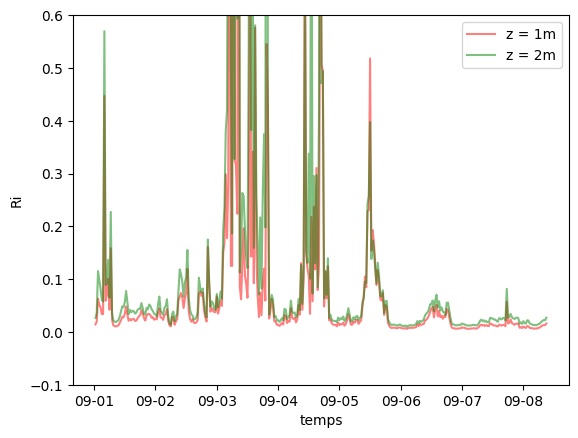

In [25]:
date_format=mpl.dates.DateFormatter("%m-%d")
fig=plt.figure()
ax1=plt.subplot(111)
ax1.plot(tps_30min,Ri_1,color='r', label='z = 1m',alpha=0.5)
ax1.plot(tps_30min,Ri_2,color='g',label='z = 2m',alpha=0.5)
ax1.xaxis.set_major_formatter(date_format)
ax1.set_xlabel("temps")
ax1.set_ylabel(r"Ri")
ax1.set_ylim(-0.1,0.6)
ax1.legend()
#plt.savefig(repertoire_figures+"T2R_evolution_Ri.png")

(-0.2, 0.6)

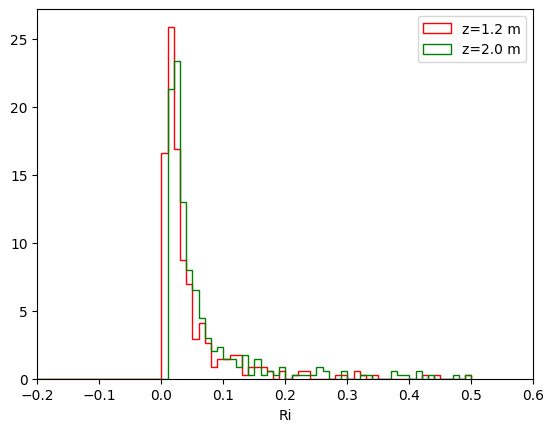

In [26]:
plt.hist(Ri_1,color='r',histtype='step',
        label='z=1.2 m',bins=100,range=(-0.5,0.5),density=True)
plt.hist(Ri_2,color='g',histtype='step',
        label='z=2.0 m',bins=100,range=(-0.5,0.5),density=True)
plt.xlabel("Ri")
plt.legend()
plt.xlim(-0.2,0.6)

(-0.2, 0.6)

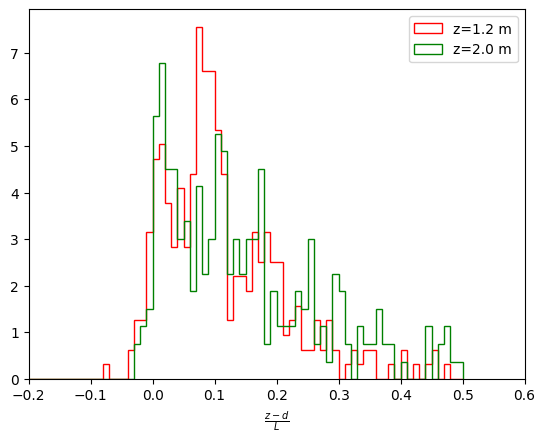

In [27]:
plt.hist(T2_1_30min['zL'].values,color='r',histtype='step',
        label='z=1.2 m',bins=100,range=(-0.5,0.5),density=True)
plt.hist(T2_2_30min['zL'].values,color='g',histtype='step',
        label='z=2.0 m',bins=100,range=(-0.5,0.5),density=True)
plt.xlabel(r"$\frac{z-d}{L}$")
plt.legend()
plt.xlim(-0.2,0.6)

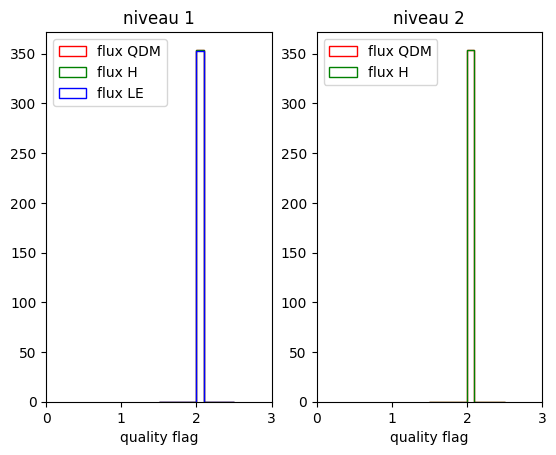

In [28]:
#histogramme controle qualité
fig=plt.figure()
ax1=plt.subplot(121)
ax1.set_title("niveau 1")
ax1.hist(T2_1_30min['qc_Tau'].values,color='r',histtype='step',
        label='flux QDM')
ax1.hist(T2_1_30min['qc_H'].values,color='g',histtype='step',
        label='flux H')
ax1.hist(T2_1_30min['qc_LE'].values,color='b',histtype='step',
        label='flux LE')
#plt.hist(T2_1_30min['qc_LE'].values,color='b',histtype='stepfilled',
        #label='flux LE')
ax1.set_xlabel("quality flag")
ax1.set_xlim(0,3)
ax1.legend()

ax2=plt.subplot(122)
ax2.set_title("niveau 2")
ax2.hist(T2_2_30min['qc_Tau'].values,color='r',histtype='step',
        label='flux QDM')
ax2.hist(T2_2_30min['qc_H'].values,color='g',histtype='step',
        label='flux H')
ax2.set_xlabel("quality flag")
ax2.set_xlim(0,3)
ax2.legend()

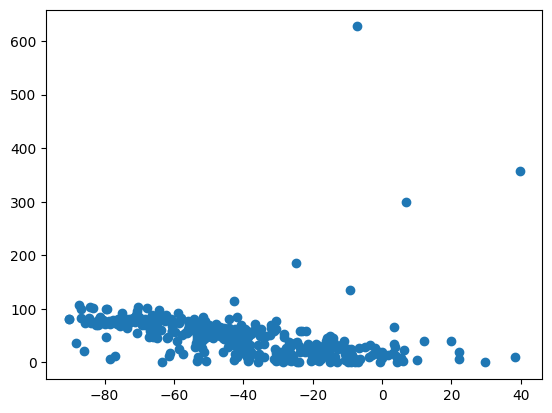

In [29]:
#methode Bulk niveau 1
kappa=0.41#constante de Von Neumann
z_1=z_T2_1_30min
U_1=np.sqrt(T2_1_30min['u_mean'].values**2+T2_1_30min['v_mean'].values**2)
T_1=T2_1_30min['ts_mean'].values
q_1=T2_1_30min['specific_humidity'].values
C_p=T2_1_30min['air_heat_capacity'].values
rho=T2_1_30min['air_density'].values
H_EC_1=T2_1_30min['H'].values
#A changer
#z_0=0.001#m
#z_T=0.001#m

def H_bulk(Ri_B,U_z, T_z,T_s,z,z_0=0.0001,z_T=0.001):
    return (rho*C_p*(kappa**2)*U_z*(T_z-T_s)*C_D(Ri_B))/(np.log(z/z_0)*np.log(z/z_T))
def C_D(Ri):
    res=np.ones(len(Ri))
    for i in range(0,len(Ri)):
        res[i]=(1.0-5.0*Ri[i])**2 if Ri[i]>0 else (1-16.0*Ri[i])**0.75
    return res
H_bulk_1=H_bulk(Ri_1,U_1,T_1,273.15,z_1)
plt.scatter(H_EC_1,H_bulk_1)

In [30]:
#affichage des fonctions ogives
#on ne sélectionne que celles avec un Ri entre 0 et 0.1


def plot_MRD_bins(Ds_binned, var,axis,**kwargs):
    for groups in Ds_binned.groups:
        Ds_i=Ds_binned[groups]
        Ds_moy=Ds_i[var].mean(axis).values
        Ds_std=Ds_i[var].std(axis).values
        """
        plt.errorbar(Ds_i.coords['temps'].values,
                     Ds_moy,yerr=Ds_std,label=axis+'=('+str(groups.left)+','+str(groups.right)+')',**kwargs)"""
        plt.plot(Ds_i.coords['temps'].values,Ds_moy,label=axis+'=('+str(groups.left)+','+str(groups.right)+')')
        #                                                              type pandas.interval
        plt.fill_between(Ds_i.coords['temps'].values,Ds_moy-Ds_std,Ds_moy+Ds_std,alpha=0.2)
"""
og_Ri_1=ogives_1_30min.assign_coords({"Ri":('temps',Ri_1)}).set_xindex('Ri')#.sel(Ri=slice(0.0,0.1))
og_Ri_2=ogives_2_30min.assign_coords({"Ri":('temps',Ri_2)}).set_xindex('Ri')#.sel(Ri=slice(0.0,0.1))

print(og_Ri_1)

og_Ri_1_moy=og_Ri_1.mean('temps',skipna=True)
og_Ri_2_moy=og_Ri_2.mean('temps',skipna=True)

og_Ri_1_std=og_Ri_1.std('temps')
og_Ri_2_std=og_Ri_2.std('temps')

print(og_Ri_1_moy)
print(og_Ri_1_std)

fig=plt.figure()
og_Ri_1_moy['og_wts'].plot()
plt.xscale('log')
plt.yscale('log')
"""

'\nog_Ri_1=ogives_1_30min.assign_coords({"Ri":(\'temps\',Ri_1)}).set_xindex(\'Ri\')#.sel(Ri=slice(0.0,0.1))\nog_Ri_2=ogives_2_30min.assign_coords({"Ri":(\'temps\',Ri_2)}).set_xindex(\'Ri\')#.sel(Ri=slice(0.0,0.1))\n\nprint(og_Ri_1)\n\nog_Ri_1_moy=og_Ri_1.mean(\'temps\',skipna=True)\nog_Ri_2_moy=og_Ri_2.mean(\'temps\',skipna=True)\n\nog_Ri_1_std=og_Ri_1.std(\'temps\')\nog_Ri_2_std=og_Ri_2.std(\'temps\')\n\nprint(og_Ri_1_moy)\nprint(og_Ri_1_std)\n\nfig=plt.figure()\nog_Ri_1_moy[\'og_wts\'].plot()\nplt.xscale(\'log\')\nplt.yscale(\'log\')\n'

In [31]:
print(Ri_1.size)

354


In [32]:
da = xr.DataArray(

    [np.NaN,np.NaN,0,8],

    coords=[np.array([358, 359, 0, 1])],

    dims="lon",

)
print(da)
db=da.assign_coords({"toto":('lon',[np.NaN,7,89,9])}).set_xindex('toto')
print(db)
print(db.mean('lon'))

<xarray.DataArray (lon: 4)>
array([nan, nan,  0.,  8.])
Coordinates:
  * lon      (lon) int32 358 359 0 1
<xarray.DataArray (lon: 4)>
array([nan, nan,  0.,  8.])
Coordinates:
  * lon      (lon) int32 358 359 0 1
  * toto     (lon) float64 nan 7.0 89.0 9.0
<xarray.DataArray ()>
array(4.)


In [33]:
def R_2(model,data):
    #retourne le coef. de correlation R^2
    masque= np.array(np.isnan(model) | np.isnan(data))#on enlève les NaN
    new_model=np.ma.array(model,mask=masque).compressed()
    new_data=np.ma.array(data,mask=masque).compressed()
    return scipy.stats.linregress(new_model,new_data).rvalue**2
print(R_2([np.NaN,0,6],[0,8,9]))

1.0


In [34]:
def slope_1(x,axis=None,**kwargs):
    x_range=np.linspace(np.min(x),np.max(x),x.size)
    if isinstance(x,mpl.axes.Axes):
        axis.plot(x_range,x_range,**kwargs)
    else:
        plt.plot(x_range,x_range,**kwargs)

Text(-0.08, 0.0, '$R^2$ = 0.635')

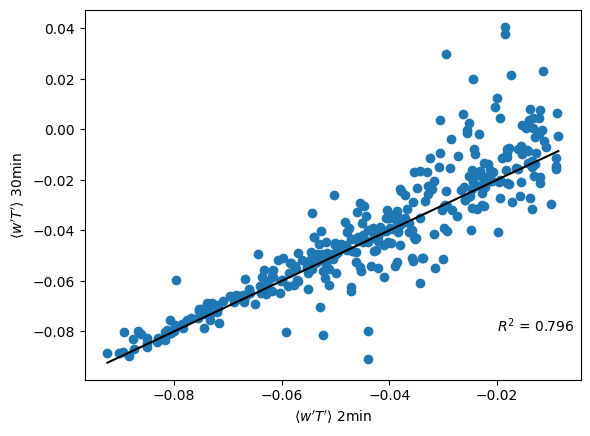

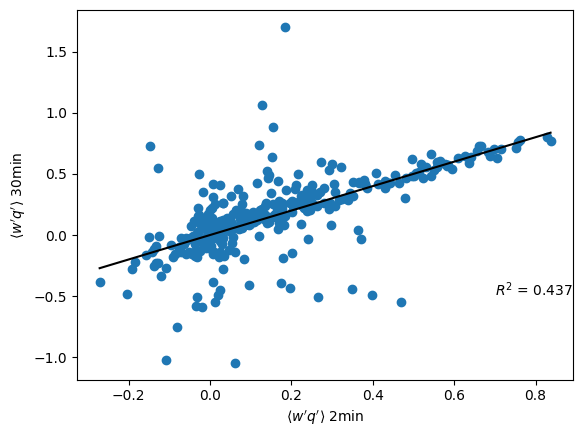

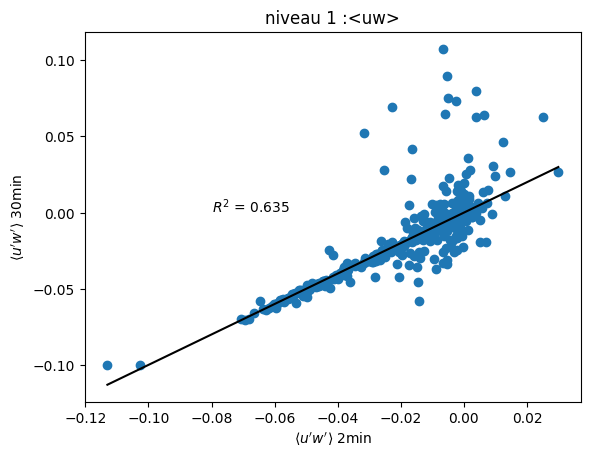

In [35]:
T2_1_2min_moy=T2_1_2min.coarsen(temps=15,side='left').mean()
T2_2_2min_moy=T2_2_2min.coarsen(temps=15,side='left').mean()
#print(T2_1_2min_moy)
#print(T2_1_2min_moy.coords['temps'].values)
x=np.linspace(-0.09,0.0)
fig=plt.figure()
#plt.title("niveau 1 : H")
plt.scatter(T2_1_2min_moy['wts_cov'].values,T2_1_30min['wts_cov'].values)
plt.xlabel(r"$\langle w'T'\rangle$ 2min")
plt.ylabel(r"$\langle w'T'\rangle$ 30min")
slope_1(T2_1_2min_moy['wts_cov'].values,color='k')
plt.text(-0.02,-0.08,r"$R^2$ = {}".format(np.around(R_2(T2_1_2min_moy['wts_cov'].values,T2_1_30min['wts_cov'].values),3)))


fig=plt.figure()
#plt.title("niveau 1 : LE")
x=np.linspace(-0.3,0.9)
plt.scatter(T2_1_2min_moy['wh2o_cov'].values,T2_1_30min['wh2o_cov'].values)
slope_1(T2_1_2min_moy['wh2o_cov'].values,color='k')
plt.xlabel(r"$\langle w'q' \rangle$ 2min")
plt.ylabel(r"$\langle w'q' \rangle$ 30min")
plt.text(0.7,-0.5,r"$R^2$ = {}".format(np.around(R_2(T2_1_2min_moy['wh2o_cov'].values,T2_1_30min['wh2o_cov'].values),3)))
plt.savefig(repertoire_figures+"T2R_wq_30min_vs_2min.png")


fig=plt.figure()
plt.title("niveau 1 :<uw>")
plt.scatter(T2_1_2min_moy['wu_cov'].values,T2_1_30min['wu_cov'].values)
slope_1(T2_1_2min_moy['wu_cov'].values,color='k')
plt.xlabel(r"$\langle u'w' \rangle$ 2min")
plt.ylabel(r"$\langle u'w' \rangle$ 30min")
plt.text(-0.08,0.0,r"$R^2$ = {}".format(np.around(R_2(T2_1_2min_moy['wu_cov'].values,T2_1_30min['wu_cov'].values),3)))

Text(0.1, 0.2, '$R^2$ = 0.323')

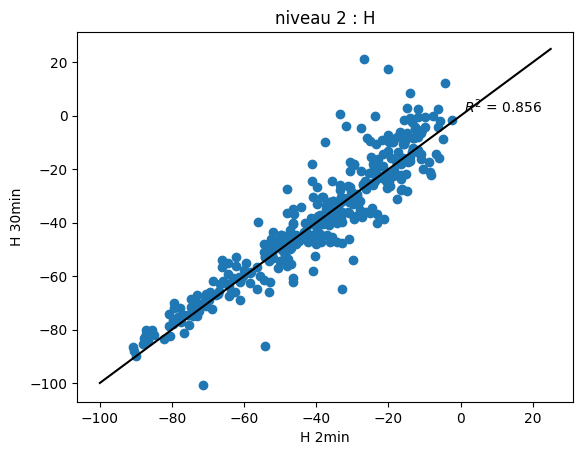

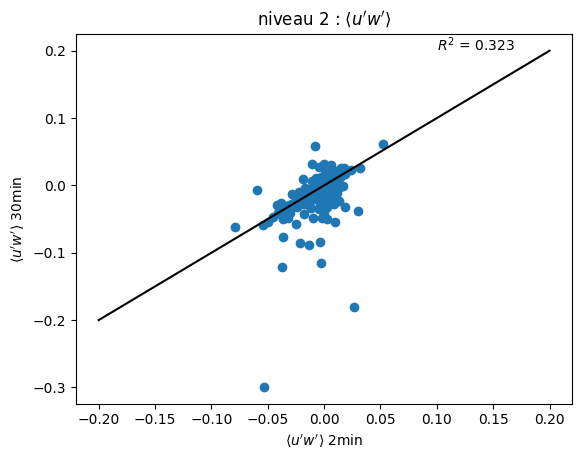

In [36]:
x=np.linspace(-100,25)
fig=plt.figure()
plt.title("niveau 2 : H")
plt.scatter(T2_2_2min_moy['H'].values,T2_2_30min['H'].values)
plt.xlabel('H 2min')
plt.ylabel('H 30min')
plt.plot(x,x,color='k')
plt.text(1,1,r"$R^2$ = {}".format(np.around(R_2(T2_2_2min_moy['H'].values,T2_2_30min['H'].values),3)))
fig=plt.figure()
x=np.linspace(-0.2,0.2)
plt.title(r"niveau 2 : $\langle u'w' \rangle$")
plt.scatter(T2_2_2min_moy['wu_cov'].values,T2_2_30min['wu_cov'].values)
plt.plot(x,x,color='k')
plt.xlabel(r"$\langle u'w' \rangle$ 2min")
plt.ylabel(r"$\langle u'w' \rangle$ 30min")
plt.text(0.10,0.2,r"$R^2$ = {}".format(np.around(R_2(T2_2_2min_moy['wu_cov'].values,T2_2_30min['wu_cov'].values),3)))

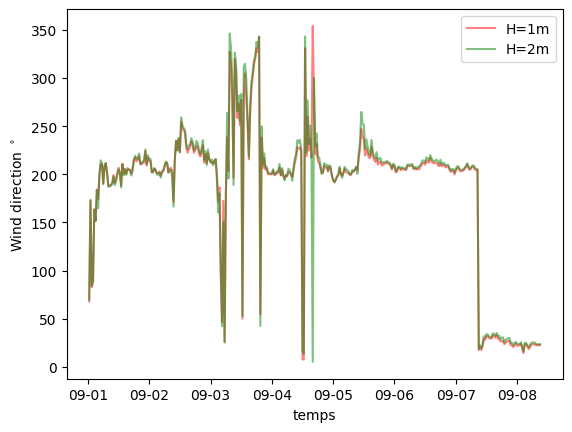

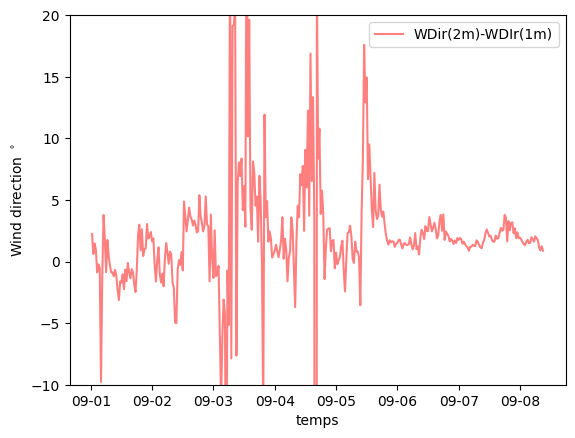

In [37]:
date_format=mpl.dates.DateFormatter("%m-%d")
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(T2_1_30min.coords['temps'].values,T2_1_30min['wind_dir'].values,color='r',label="H=1m",alpha=0.5)
ax.plot(T2_2_30min.coords['temps'].values,T2_2_30min['wind_dir'].values,color='g',label="H=2m",alpha=0.5)
#plt.axhline(200+30,color='r')
#plt.axhline(200-30,color='r')
ax.legend()
ax.set_xlabel("temps")
ax.set_ylabel(r"Wind direction $^\circ$")
#ax.set_ylim(200-30,200+30)
ax.xaxis.set_major_formatter(date_format)


date_format=mpl.dates.DateFormatter("%m-%d")
fig=plt.figure()
ax2 = fig.add_subplot(111)
ax2.plot(T2_1_30min.coords['temps'].values,T2_2_30min['wind_dir'].values-T2_1_30min['wind_dir'].values,
         color='r',
         label="WDir(2m)-WDIr(1m)",
         alpha=0.5)
#plt.axhline(200+30,color='r')
#plt.axhline(200-30,color='r')
ax2.legend()
ax2.set_xlabel("temps")
ax2.set_ylabel(r"Wind direction $^\circ$")
ax2.set_ylim(-10,+20)
ax2.xaxis.set_major_formatter(date_format)
plt.savefig(repertoire_figures+"T2_Right_WDir_shift.png")

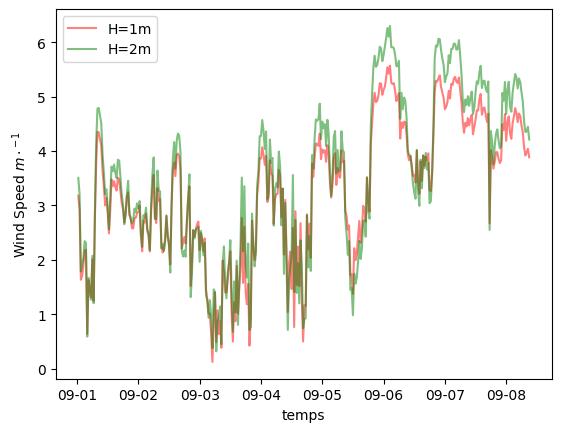

In [38]:
date_format=mpl.dates.DateFormatter("%m-%d")
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(T2_1_30min.coords['temps'].values,T2_1_30min['wind_speed'].values,color='r',label="H=1m",alpha=0.5)
ax.plot(T2_2_30min.coords['temps'].values,T2_2_30min['wind_speed'].values,color='g',label="H=2m",alpha=0.5)
#plt.axhline(200+30,color='r')
#plt.axhline(200-30,color='r')
ax.legend()
ax.set_xlabel("temps")
ax.set_ylabel(r"Wind Speed $m\cdot^{-1}$")

ax.xaxis.set_major_formatter(date_format)

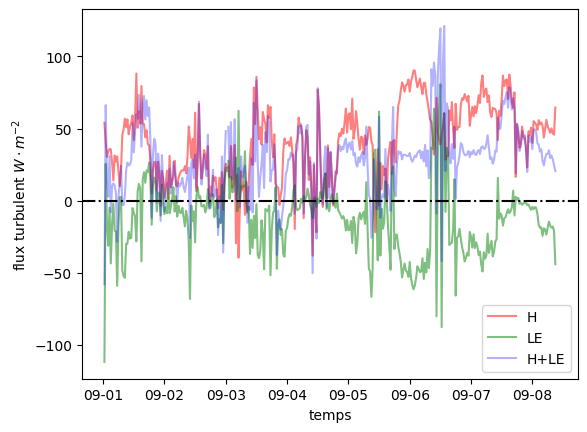

In [50]:
date_format=mpl.dates.DateFormatter("%m-%d")
#date_format=mpl.dates.DateFormatter("%H")
tps_30min=T2_1_30min.coords['temps'].values
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(tps_30min,-T2_1_30min['H'].values,color='r',label='H',alpha=0.5)
ax.plot(tps_30min,-T2_1_30min['LE'].values,color='g',label='LE',alpha=0.5)
ax.plot(tps_30min,-(T2_1_30min['LE'].values+T2_1_30min['H'].values),color='b',label='H+LE',alpha=0.3)
ax.set_xlabel("temps")
ax.xaxis.set_major_formatter(date_format)
ax.set_ylabel(r"flux turbulent $W\cdot m^{-2}$")
ax.legend()
ax.axhline(0,color='k', linestyle='-.')
#ax.text(np.datetime64("2023-09-02 00:00:00"), 100,"flux vers le bas positif")
plt.savefig(repertoire_figures+"T2R_H_LE.png")

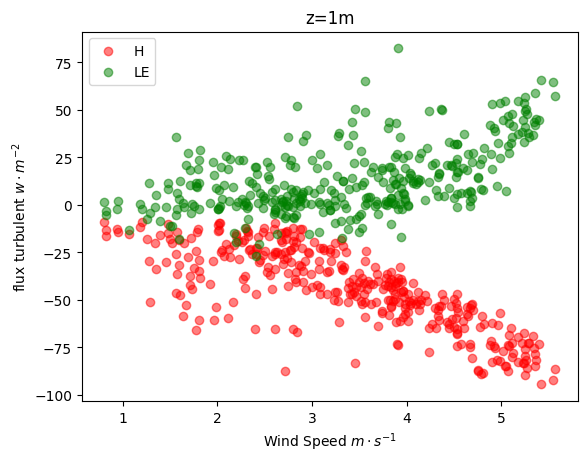

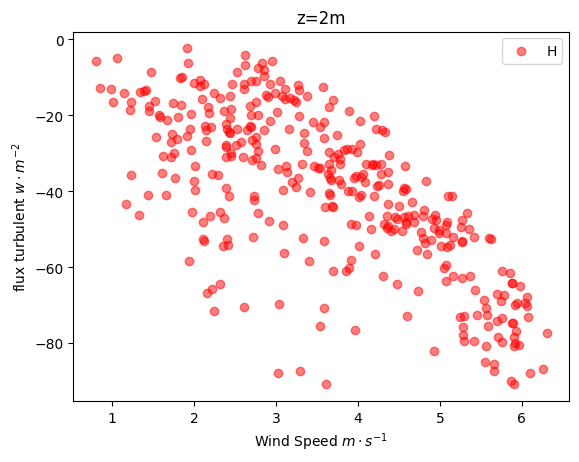

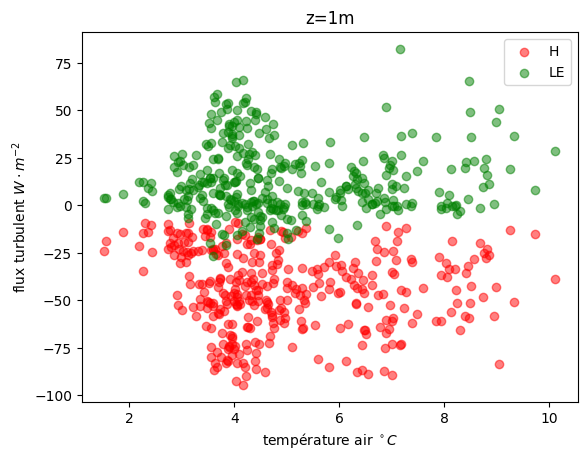

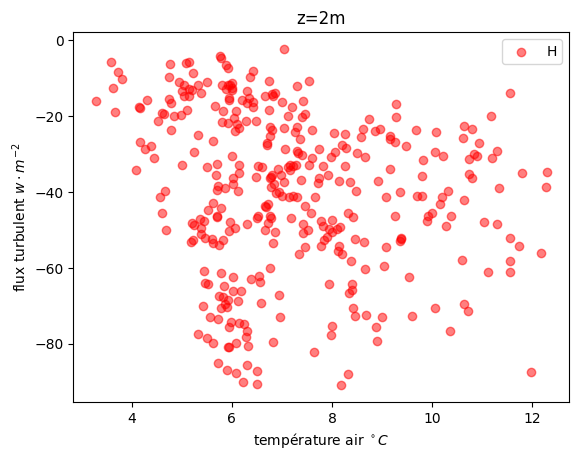

In [40]:
fig=plt.figure()
plt.title("z=1m")
plt.scatter(T2_1_2min_moy['u_rot'].values,T2_1_2min_moy['H'].values,color='r',label="H", alpha=0.5)
plt.scatter(T2_1_2min_moy['u_rot'].values,T2_1_2min_moy['LE'].values,color='g',label="LE", alpha=0.5)
plt.xlabel(r"Wind Speed $m\cdot s^{-1}$")
plt.ylabel(r"flux turbulent $w\cdot m^{-2}$")
plt.legend()
plt.savefig(repertoire_figures+"H_vs_u_T2R1.png")


fig=plt.figure()
plt.title("z=2m")
plt.scatter(T2_2_2min_moy['u_rot'].values,T2_2_2min_moy['H'].values,color='r',label="H", alpha=0.5)
plt.xlabel(r"Wind Speed $m\cdot s^{-1}$")
plt.ylabel(r"flux turbulent $w\cdot m^{-2}$")
plt.legend()
plt.savefig(repertoire_figures+"H_vs_u_T2R2.png")


fig=plt.figure()
plt.title("z=1m")
plt.scatter(T2_1_2min_moy['air_temperature'].values-273.15,T2_1_2min_moy['H'].values,color='r',label="H", alpha=0.5)
plt.scatter(T2_1_2min_moy['air_temperature'].values-273.15,T2_1_2min_moy['LE'].values,color='g',label="LE", alpha=0.5)
plt.xlabel(r"température air $^\circ C$")
plt.ylabel(r"flux turbulent $W\cdot m^{-2}$")
plt.legend()
plt.savefig(repertoire_figures+"H_vs_T_T2R1.png")


fig=plt.figure()
plt.title("z=2m")
plt.scatter(T2_2_2min_moy['air_temperature'].values-273.15,T2_2_2min_moy['H'].values,color='r',label="H", alpha=0.5)
plt.xlabel(r"température air $^\circ C$")
plt.ylabel(r"flux turbulent $w\cdot m^{-2}$")
plt.legend()
plt.savefig(repertoire_figures+"H_vs_T_T2R2.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


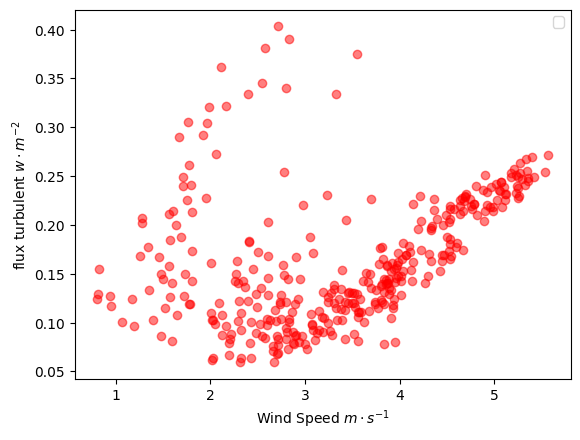

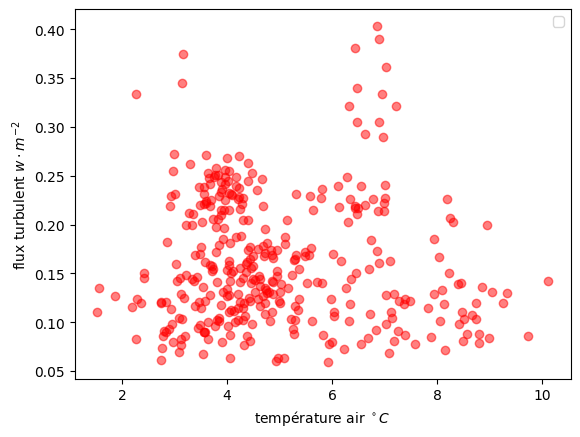

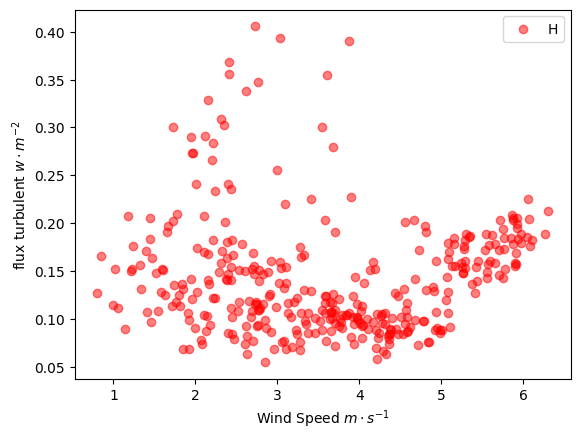

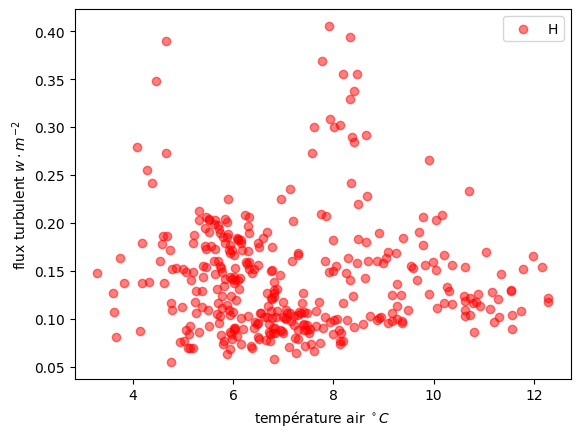

In [41]:
fig=plt.figure()
plt.scatter(T2_1_2min_moy['u_rot'].values,T2_1_2min_moy['u*'].values,color='r', alpha=0.5)
plt.xlabel(r"Wind Speed $m\cdot s^{-1}$")
plt.ylabel(r"flux turbulent $w\cdot m^{-2}$")
plt.legend()

fig=plt.figure()
plt.scatter(T2_1_2min_moy['air_temperature'].values-273.15,T2_1_2min_moy['u*'].values,color='r', alpha=0.5)
plt.xlabel(r"température air $^\circ C$")
plt.ylabel(r"flux turbulent $w\cdot m^{-2}$")
plt.legend()

fig=plt.figure()
plt.scatter(T2_2_2min_moy['u_rot'].values,T2_2_2min_moy['u*'].values,color='r',label="H", alpha=0.5)
plt.xlabel(r"Wind Speed $m\cdot s^{-1}$")
plt.ylabel(r"flux turbulent $w\cdot m^{-2}$")
plt.legend()

fig=plt.figure()
plt.scatter(T2_2_2min_moy['air_temperature'].values-273.15,T2_2_2min_moy['u*'].values,color='r',label="H", alpha=0.5)
plt.xlabel(r"température air $^\circ C$")
plt.ylabel(r"flux turbulent $w\cdot m^{-2}$")
plt.legend()

In [42]:
print(spectres_1_2min.data_vars)

Data variables:
    normalized_frequency  (freq, temps) float64 ...
    f_Su_norm             (freq, temps) float64 ...
    f_Sv_norm             (freq, temps) float64 ...
    f_Sw_norm             (freq, temps) float64 ...
    f_Sts_norm            (freq, temps) float64 ...
    f_Sh2o_norm           (freq, temps) float64 ...
    f_C_wu_norm           (freq, temps) float64 ...
    f_C_wv_norm           (freq, temps) float64 ...
    f_C_wts_norm          (freq, temps) float64 ...
    f_C_wh2o_norm         (freq, temps) float64 ...
    f_Su                  (freq, temps) float64 ...
    f_Sv                  (freq, temps) float64 ...
    f_Sw                  (freq, temps) float64 ...
    f_Sts                 (freq, temps) float64 ...
    f_C_wts               (freq, temps) float64 ...


In [43]:
print(T2_1_30min['air_pressure'].values)

[73298.6 73312.4 73316.4 73320.  73321.4 73319.  73315.3 73315.1 73329.5
 73334.1 73335.2 73345.2 73361.1 73372.6 73395.2 73409.9 73426.8 73440.7
 73457.1 73465.6 73482.7 73482.6 73496.6 73503.1 73508.9 73511.5 73509.7
 73508.4 73505.2 73506.9 73507.2 73510.3 73509.8 73512.2 73514.7 73529.4
 73554.3 73576.6 73598.  73617.4 73628.3 73632.7 73645.  73654.4 73659.1
 73668.4 73673.1 73666.2 73649.1 73645.1 73645.  73646.1 73642.5 73639.9
 73635.5 73636.6 73642.  73656.  73675.7 73686.  73699.8 73715.2 73734.
 73753.7 73772.1 73796.9 73824.9 73844.6 73850.4 73851.  73852.  73853.9
 73854.  73850.9 73850.2 73856.7 73868.5 73851.2 73863.6 73873.1 73892.5
 73901.3 73915.3 73919.9 73934.8 73951.6 73970.5 73986.  74009.8 74025.1
 74026.7 74030.1 74029.4 74024.8 74020.7 74017.5 74013.1 73997.3 73994.7
 73994.3 74013.5 74013.8 73994.1 73998.  74013.7 74027.3 74014.3 74023.1
 74072.7 74078.9 74116.4 74180.6 74188.4 74173.4 74200.  74215.1 74214.6
 74212.8 74232.5 74227.9 74223.8 74228.5 74242.9 742

In [44]:
#fonctions pour la méthode Bulk. On utilisera z/L calculé à partir d'EddyPro
#dans un premier temps
import numpy as np
import xarray as xr
import scipy

kappa=0.35
#beta_m=4.7
#beta_h=4.7
#beta_q=4.7
#z_0=0.001#m
#z_t=0.01*z_0
#z_q=0.01*z_qP

def P_sat(T):
    "retourne la pression de vapeur saturante en Pa (cf Charrondiere), pour une température T en K"
    return 611.0*np.exp(((2.5e6)/462.0)*(1.0/273.15-1.0/T))

def q_sat(T,P):
    "retourne l'humidité spécifique à saturation (RH=100%)."
    #T : K, P: Pa
    return 0.622*P_sat(T)/P

#chaleur latente de vaporisation (en J/kg
#Tair en K
L_v=lambda Tair:1.0e3*(3147.5-2.37*Tair)

def u_s(u_moy,
        z,
        zL,
        beta_m=4.7,
        z0=0.001):
    return (kappa*u_moy)/(np.log(z/z0)+beta_m*zL)

def wT(T_moy,
       u_moy,
       z,
       zL,
       T_s=273.15,
       zt=0.00001,
       beta_t=4.7,
       **kwargs):
    return -u_s(u_moy,z,zL,**kwargs)*(kappa*(T_moy-T_s))/(np.log(z/zt)+beta_t*zL)

def wq(q_moy,
       u_moy,
       z,
       zL,
       Press,
       T_s=273.15,
       zq=0.00001,
       beta_q=4.7,
       **kwargs):
    return -u_s(u_moy,z,zL,**kwargs)*(kappa*(q_moy-q_sat(T_s, Press)))/(np.log(z/zq)+beta_q*zL)

#fonctions plus haut niveau
#pour utiliser les Datasets
def us_bulk(Ds,mode='zL',**params):
    return u_s(Ds['u_rot'],
               Ds['instrument_height'],
               Ds['zL'] if mode == 'zL' else Ds['Ri_b'],
               **params)

def wT_bulk(Ds,mode='zL',**params):
    return wT(Ds['air_temperature'],
              Ds['u_rot'],
              Ds['instrument_height'],
              Ds['zL'] if mode == 'zL' else Ds['Ri_b'],
              **params)
def wq_bulk(Ds,mode='zL',**params):
    return wq(Ds['specific_humidity'],
              Ds['u_rot'],
              Ds['instrument_height'],
              Ds['zL'] if mode == 'zL' else Ds['Ri_b'],
              Ds['air_pressure'],
             **params)


def H_bulk(Ds,**params):
    return Ds['air_heat_capacity']*wT_bulk(Ds,**params)

def LE_bulk(Ds,**params):
    return (L_v(Ds['air_temperature'])*Ds['air_density'])*wq_bulk(Ds,**params)



#fonctions pour calculer la rugosité de surface à partir des flux turbulents, sur un seul niveau
#D'après Fitzpatrick 2019
def get_z0(u_moy,u_star,z,zL,beta_m=4.7):
    return np.exp(-beta_m*zL-kappa*(u_moy/u_star))*z

def get_zt(T_moy,T_star,z,zL,T_s=273.15,beta_h=4.7):
    return np.exp(-beta_h*zL-kappa*(T_moy-T_s)/T_star)*z

def get_zq(q_moy,wq,u_star,Press,z,zL,T_s=273.15,beta_q=4.7):
    qs=q_sat(T_s,Press)
    q_star=-wq/u_star
    return np.exp(-beta_q*zL-kappa*(q_moy-qs)/q_star)*z

#idem : fonctions de plus haut niveau
def z0_EC(Ds,mode='zL',**params):
    return get_z0(Ds['u_rot'],
                  Ds['u*'],
                  Ds['instrument_height'],
                  Ds['zL'] if mode == 'zL' else Ds['Ri_b'],
                  **params)
def zt_EC(Ds,mode='zL',**params):
    return get_zt(Ds['air_temperature'],
                  Ds['T*'],
                  Ds['instrument_height'],
                  Ds['zL'] if mode == 'zL' else Ds['Ri_b'],
                  **params)
def zq_EC(Ds,mode='zL',**params):
    return get_zq(Ds['specific_humidity'],
                  Ds['wh2o_cov'],
                  Ds['u*'],
                  Ds['air_pressure'],
                  Ds['instrument_height'],
                  Ds['zL'] if mode == 'zL' else Ds['Ri_b'],
                  **params)

#Quelques fonctions utiles
#nombre de Richardson Bulk
def get_Ri_B(U,T_z,z,T_s=273.15):
    "retourne le nombre de Richardson Bulk, avec T_z et T_s les températures à la hauteur z et en surface (en K)"
    return (9.81*(T_z-T_s)*z)/(T_s*(U**2))

def new_Ri_B(Ds,**params):
    return get_Ri_B(Ds['u_rot'],
                    Ds['air_temperature'],
                    Ds['instrument_height'],
                    **params)

def slope_1(x,axis=None,**kwargs):
    x_range=np.linspace(np.nanmin(x),np.nanmax(x),x.size)
    if isinstance(x,mpl.axes.Axes):
        axis.plot(x_range,x_range,**kwargs)
    else:
        plt.plot(x_range,x_range,**kwargs)

def R_2(model,data):
    #retourne le coef. de correlation R^2 entre deux tableaux
    masque= np.array(np.isnan(model) | np.isnan(data))#on enlève les NaN
    new_model=np.ma.array(model,mask=masque).compressed()
    new_data=np.ma.array(data,mask=masque).compressed()
    return scipy.stats.linregress(new_model,new_data).rvalue**2

def MBE(model,data):
    return np.nanmean(model-data)

def MSE(model,data):
    return np.nanmean((data-model)**2)

def RMSE(model,data):
    return np.sqrt(MSE(data,model))

def RMSE_norm(model,data):
    return np.sqrt(MSE(data,model))/np.nanstd(data)

def MRBE(model, data):
    err_rel=np.abs((data-model)/data)
    print(err_rel)
    return np.nanmean(err_rel,where=err_rel <=1.0e1 )

def texte(model,data,units="W/m^2",err=1.0e1):
    R2_texte="$R^2$ = {:.3f}".format(R_2(model, data))+"\n"
    MBE_texte="MBE = {:.3f}".format(MBE(model, data))+" "+units+"\n"
    MRBE_texte="MRBE = {:.3f} %\n".format(100.0*MRBE(model, data))
    RMSE_texte="RMSE = {:.3f}".format(RMSE(model, data))+" "+units
    return R2_texte+MBE_texte+MRBE_texte+RMSE_texte

In [45]:
a=np.array([1,1,2])
print(np.mean(a,where=a<2))

1.0


In [46]:
#Test des fonctions de stabilité sur le premier niveau
def phi(zSL,a,b):
    return a*zSL+b

#print(f"z_1 {z_1}")
def derivee_avant(y_sup,y,delta_x):
    return(y_sup - y)/delta_x
kappa=0.41#constante de Prandtl

flag_isnan=lambda x:np.isnan(x)
flag_isinf=lambda x:np.isinf(x)
flag_outliers=lambda x:np.logical_not(flag_isnan(x) | flag_isinf(x))
flag_outliers_vars= lambda x: (flag_outliers(x['u_rot']) & 
                               flag_outliers(x['u*']) &
                               flag_outliers(x['T*']) &
                               flag_outliers(x['zL']) &
                               flag_outliers(x['instrument_height']) &
                              flag_outliers(x['specific_humidity']) &
                              flag_outliers(x['ts_mean']) &
                              flag_outliers(x['air_pressure']) &
                              flag_outliers(x['wh2o_cov']))
T2_1_30min_sim=T2_1_30min.where(flag_outliers_vars(T2_1_30min),drop=True).sortby('zL')

delta_z=T2_1_30min_sim['instrument_height'].values
zL_1=T2_1_30min_sim['zL'].values
ts_moy_1=T2_1_30min_sim['ts_mean'].values
u_s_1=T2_1_30min_sim['u*'].values
t_s_1=T2_1_30min_sim['T*'].values
U_moy_1=T2_1_30min_sim['u_rot'].values
q_moy_1=T2_1_30min_sim['specific_humidity'].values
qsat_1=q_sat(273.15,T2_1_30min_sim['air_pressure'].values)

dT_dz=(ts_moy_1-273.15)/delta_z
dU_dz=U_moy_1/delta_z
dq_dz=(q_moy_1-qsat_1)/delta_z

q_star=-T2_1_30min_sim['wh2o_cov'].values/u_s_1

flux_grad_U=(kappa*delta_z/u_s_1)*dU_dz
flux_grad_T=(kappa*delta_z/t_s_1)*dT_dz
flux_grad_q=(kappa*delta_z/q_star)*dq_dz

beta=4.7
alpha=1.0
phi_m=phi(zL_1,beta,alpha)
phi_h=phi(zL_1,beta,alpha)
phi_q=phi(zL_1,beta,alpha)

fig=plt.figure()
plt.scatter(zL_1,
            flux_grad_U,
            alpha=0.5,
            label=r'$\frac{\kappa z}{u^{*}}\frac{\partial \langle u \rangle}{\partial z}$')
plt.plot(zL_1,
         phi_m,
         label=r'$\phi_m (\frac{z}{L})=1+4.7\frac{z}{L}$',color='k')
#plt.xlim(0,10)
plt.xlabel(r"$\frac{z}{L}$")
plt.ylabel(r"$\phi(\frac{z}{L})$")
#plt.ylim(-3,10)
plt.xscale('log')
plt.legend()
plt.text(1,1,r"$R^2$ {}".format(R_2(phi_m,flux_grad_U)))
#plt.xlim(right=0.2)


fig=plt.figure()
plt.xscale('log')
plt.scatter(zL_1,
            flux_grad_T,
            alpha=0.5,
            label=r'$\frac{\kappa z}{T^{*}}\frac{\partial \langle T \rangle}{\partial z}$')
plt.plot(zL_1,
         phi_h,
         label=r'$\phi_m (\frac{z}{L})=1+4.7\frac{z}{L}$',color='k')
#plt.xlim(0.00001,10)
plt.xlabel(r"$\frac{z}{L}$")
plt.ylabel(r"$\phi(\frac{z}{L})$")
#plt.text(1,1,r"$R^2$ {}".format(R_2(phi_h,flux_grad_T)))
plt.legend()
#plt.xlim(right=0.2)
plt.ylim(0,20)

fig=plt.figure()
plt.xscale('log')
plt.scatter(zL_1,
            flux_grad_q,
            alpha=0.5,
            label=r'$\frac{\kappa z}{q^{*}}\frac{\partial \langle q \rangle}{\partial z}$')
plt.plot(zL_1,
         phi_q,
         label=r'$\phi_m (\frac{z}{L})=1+4.7\frac{z}{L}$',color='k')
plt.ylim(-2,
plt.xlabel(r"$\frac{z}{L}$")
plt.ylabel(r"$\phi(\frac{z}{L})$")
#plt.text(1,1,r"$R^2$ {}".format(R_2(phi_h,flux_grad_T)))
plt.legend()
#plt.xlim(right=0.2)

SyntaxError: '(' was never closed (3827001465.py, line 93)

In [ ]:

T=274
P=1.0e5#Pa
print(f"T={T} K")
print(f"P={P} Pa")
print(f"P_sat= {P_sat(T)} Pa")
print(f"Lv={L_v(T)*1.0e-3} kJ/kg")
print(f"q_sat {q_sat(T,P)} kg/kg")

In [ ]:
z_0=0.004#m
z_t=z_q=1.0e-1*z_0

H_Bulk_1=H_bulk(T2_1_30min,z0=z_0,zt=z_t).values
us_Bulk_1=us_bulk(T2_1_30min,z0=z_0).values
LE_Bulk_1=LE_bulk(T2_1_30min,z0=z_0,zq=z_q).values

H_bulk_2=H_bulk(T2_2_30min,z0=z_0,zt=z_t).values
u_star2=us_bulk(T2_2_30min,z0=z_0).values



print(f"rugosités : ")
print(f"z_0 = {z_0} m")
print(f"z_t = {z_t} m")
print(f"z_q = {z_q} m")

print("H niveau 1 : ")
print(f"R^2 {R_2(H_Bulk_1,T2_1_30min['H'].values)}")
print(f"MBE {MBE(H_Bulk_1,T2_1_30min['H'].values)} W/m^2")
print(f"RMSE {RMSE(H_Bulk_1,T2_1_30min['H'].values)} W/m^2")
print(f"RMSE_norm {RMSE_norm(H_Bulk_1,T2_1_30min['H'].values)} ")

print("us niveau 1 : ")
print(f"R^2 {R_2(us_Bulk_1,T2_1_30min['u*'].values)}")
print(f"MBE {MBE(us_Bulk_1,T2_1_30min['u*'].values)} m/s")
print(f"RMSE {RMSE(us_Bulk_1,T2_1_30min['u*'].values)} m/s")
print(f"RMSE_norm {RMSE_norm(us_Bulk_1,T2_1_30min['u*'].values)}")

print("LE niveau 1 : ")
print(f"R^2 {R_2(LE_Bulk_1,T2_1_30min['LE'].values)}")
print(f"MBE {MBE(LE_Bulk_1,T2_1_30min['LE'].values)} W/m^2")
print(f"RMSE {RMSE(LE_Bulk_1,T2_1_30min['LE'].values)} W/m^2")
print(f"RMSE_norm {RMSE_norm(LE_Bulk_1,T2_1_30min['LE'].values)} ")

print(f"Niveau 2:")
print(f"H => R^2= {R_2(T2_2_30min['H'].values, H_bulk_2)}")
print(f"u* => R^2= {R_2(T2_2_30min['u*'].values, u_star2)}")


fig=plt.figure()
plt.title(r"niveau 1 : $u^*$")
plt.scatter(T2_1_30min['u*'].values,us_Bulk_1,alpha=0.5)
slope_1(T2_1_30min['u*'].values,color='k',label=r"$u^{*}=u^{*}$ EC")
plt.xlabel(r"$u^{*}$EC")
plt.ylabel(r"$u^{*}$ bulk")
plt.legend()

fig=plt.figure()
plt.title(r"niveau 1 : $H$")
plt.scatter(T2_1_30min['H'].values,H_Bulk_1,alpha=0.5)
slope_1(T2_1_30min['H'].values,color='k',label=r"$H=H$ EC")
plt.xlabel(r"$H$ EC")
plt.ylabel(r"$H$ bulk")
plt.legend()
plt.ylim(-100,100)

fig=plt.figure()
plt.title(r"niveau 1 : $LE$")
plt.scatter(T2_1_30min['LE'].values,LE_Bulk_1,alpha=0.5)
slope_1(T2_1_30min['LE'].values,color='k',label=r"$LE=LE$ EC")
plt.xlabel(r"$LE$ EC ($W\cdot m^{-2}$)")
plt.ylabel(r"$LE$ bulk ($W\cdot m^{-2}$)")
plt.text(0.25,0.05,texte(LE_Bulk_1,T2_1_30min['LE'].values,units=r'$W\cdot m^{-2}$'),transform=ax2.transAxes)
plt.legend()
plt.ylim(-100,100)

fig=plt.figure(figsize=(10,10))
fig.subplots_adjust(wspace=0.3)
ax1=fig.add_subplot(131)
plt.scatter(T2_1_30min['H'].values,H_Bulk_1,alpha=0.5)
slope_1(T2_1_30min['H'].values,color='k',label=r"$H=H$ EC")
plt.xlabel(r"$H$ EC ($W\cdot m^{-2}$)")
plt.ylabel(r"$H$ bulk ($W\cdot m^{-2}$)")
plt.text(0.25,0.05,texte(H_Bulk_1,T2_1_30min['H'].values,units=r'$W\cdot m^{-2}$'),transform=ax1.transAxes)
ax2=fig.add_subplot(132)
plt.scatter(T2_1_30min['LE'].values,LE_Bulk_1,alpha=0.5)
slope_1(T2_1_30min['LE'].values,color='k',label=r"$LE=LE$ EC")
plt.xlabel(r"$LE$ EC ($W\cdot m^{-2}$)")
plt.ylabel(r"$LE$ bulk ($W\cdot m^{-2}$)")
plt.text(0.25,0.05,texte(LE_Bulk_1,T2_1_30min['LE'].values,units=r'$W\cdot m^{-2}$'),transform=ax2.transAxes)
ax3=fig.add_subplot(133)
plt.scatter(T2_1_30min['u*'].values,us_Bulk_1,alpha=0.5)
slope_1(T2_1_30min['u*'].values,color='k',label=r"$u^{*}=u^{*}$ EC")
plt.xlabel(r"$u^{*}$EC ($m\cdot s^{-1}$)")
plt.ylabel(r"$u^{*}$ bulk ($m\cdot s^{-1}$)")
plt.text(0.25,0.05,texte(us_Bulk_1,T2_1_30min['u*'].values,units=r'$m\cdot s^{-1}$'),transform=ax3.transAxes)
plt.savefig(repertoire_figures+"T2R_bulk.png")

In [ ]:
#sur 2 minutes (moyenné sur 30 minutes
z_0=0.004#m
z_t=z_q=1.0e-2*z_0


H_Bulk_1_2min=H_bulk(T2_1_2min_moy,z0=z_0,zt=z_t).values
us_Bulk_1_2min=us_bulk(T2_1_2min_moy,z0=z_0).values
LE_Bulk_1_2min=LE_bulk(T2_1_2min_moy,z0=z_0,zq=z_q).values

H_bulk_2_2min=H_bulk(T2_2_2min_moy,z0=z_0,zt=z_t).values
u_star2_2min=us_bulk(T2_2_2min_moy,z0=z_0).values



print(f"rugosités : ")
print(f"z_0 = {z_0} m")
print(f"z_t = {z_t} m")
print(f"z_q = {z_q} m")

print("H niveau 1 : ")
print(f"R^2 {R_2(H_Bulk_1_2min,T2_1_2min_moy['H'].values)}")
print(f"MBE {MBE(H_Bulk_1_2min,T2_1_2min_moy['H'].values)} W/m^2")
print(f"RMSE {RMSE(H_Bulk_1_2min,T2_1_2min_moy['H'].values)} W/m^2")
print(f"RMSE_norm {RMSE_norm(H_Bulk_1_2min,T2_1_2min_moy['H'].values)} ")

print("us niveau 1 : ")
print(f"R^2 {R_2(us_Bulk_1_2min,T2_1_2min_moy['u*'].values)}")
print(f"MBE {MBE(us_Bulk_1_2min,T2_1_2min_moy['u*'].values)} m/s")
print(f"RMSE {RMSE(us_Bulk_1_2min,T2_1_2min_moy['u*'].values)} m/s")
print(f"RMSE_norm {RMSE_norm(us_Bulk_1_2min,T2_1_2min_moy['u*'].values)}")

print("LE niveau 1 : ")
print(f"R^2 {R_2(LE_Bulk_1_2min,T2_1_2min_moy['LE'].values)}")
print(f"MBE {MBE(LE_Bulk_1_2min,T2_1_2min_moy['LE'].values)} W/m^2")
print(f"RMSE {RMSE(LE_Bulk_1_2min,T2_1_2min_moy['LE'].values)} W/m^2")
print(f"RMSE_norm {RMSE_norm(LE_Bulk_1_2min,T2_1_2min_moy['LE'].values)} ")

print(f"Niveau 2:")
print(f"H => R^2= {R_2(T2_2_2min_moy['H'].values, H_bulk_2_2min)}")
print(f"u* => R^2= {R_2(T2_2_2min_moy['u*'].values, u_star2_2min)}")


fig=plt.figure()
plt.title(r"niveau 1 : $u^*$")
plt.scatter(T2_1_2min_moy['u*'].values,us_Bulk_1_2min,alpha=0.5)
slope_1(T2_1_2min_moy['u*'].values,color='k',label=r"$u^{*}=u^{*}$ EC")
plt.xlabel(r"$u^{*}$EC")
plt.ylabel(r"$u^{*}$ bulk")
plt.legend()

fig=plt.figure()
plt.title(r"niveau 1 : $H$")
plt.scatter(T2_1_2min_moy['H'].values,H_Bulk_1_2min,alpha=0.5)
slope_1(T2_1_2min_moy['H'].values,color='k',label=r"$H=H$ EC")
plt.xlabel(r"$H$ EC")
plt.ylabel(r"$H$ bulk")
plt.legend()
plt.ylim(-100,100)

fig=plt.figure()
plt.title(r"niveau 1 : $LE$")
plt.scatter(T2_1_2min_moy['LE'].values,LE_Bulk_1_2min,alpha=0.5)
slope_1(T2_1_2min_moy['LE'].values,color='k',label=r"$LE=LE$ EC")
plt.xlabel(r"$LE$ EC")
plt.ylabel(r"$LE$ bulk")
plt.legend()
plt.ylim(-100,100)
plt.savefig(repertoire_figures+"Bulk_T2R.png")

In [ ]:
z_0=np.array([0.001,0.002,0.004,0.008,0.016])
z_t=z_0/10
fig=plt.figure()
for i in range(0,z_0.size):
    plt.scatter(T2_1_2min_moy['H'].values,H_bulk(T2_1_2min_moy,z0=z_0[i],zt=z_t[i]),
                alpha=0.5, label="z_0={}".format(np.round(z_0[i],3)))
slope_1(T2_1_2min_moy['H'].values,color='k')
plt.xlabel("H EC")
plt.ylabel("H Bulk")
plt.legend()
plt.savefig(repertoire_figures+"sensibilite_H_z0_T2R.png")


print([RMSE(T2_1_2min_moy['H'].values,H_bulk(T2_1_2min_moy,z0=z_0[i],zt=z_t[i])) for i in range(0,z_0.size)])
fig=plt.figure()
plt.plot(z_0,[RMSE(T2_1_2min_moy['H'].values,H_bulk(T2_1_2min_moy,z0=z_0[i],zt=z_t[i])) for i in range(0,z_0.size)])
plt.xlabel("z0")
plt.ylabel("RMSE (W/m^2)")
plt.savefig(repertoire_figures+"RMSE_H_z0_T2R.png")


fig=plt.figure()
plt.plot(z_0,[RMSE_norm(T2_1_2min_moy['H'].values,H_bulk(T2_1_2min_moy,z0=z_0[i],zt=z_t[i])) for i in range(0,z_0.size)])
plt.xlabel("z0")
plt.ylabel("RMSE norm (%)")

z_0=np.array([0.001,0.002,0.004,0.008,0.016])
z_q=z_0/10
fig=plt.figure()
for i in range(0,z_0.size):
    plt.scatter(T2_1_2min_moy['LE'].values,LE_bulk(T2_1_2min_moy,z0=z_0[i],zq=z_q[i]),
                alpha=0.5, label="z_0={}".format(np.round(z_0[i],3)))
slope_1(T2_1_2min_moy['LE'].values,color='k')
plt.xlabel("LE EC")
plt.ylabel("LE Bulk")
plt.legend()
plt.savefig(repertoire_figures+"sensibilite_LE_z0_T2R.png")

fig=plt.figure()
plt.plot(z_0,[RMSE(T2_1_2min_moy['LE'].values,LE_bulk(T2_1_2min_moy,z0=z_0[i],zq=z_q[i])) for i in range(0,z_0.size)])
plt.xlabel("z0")
plt.ylabel("RMSE (W/m^2)")
plt.savefig(repertoire_figures+"RMSE_LE_z0_T2R.png")

fig=plt.figure()
plt.plot(z_0,[RMSE_norm(T2_1_2min_moy['LE'].values,LE_bulk(T2_1_2min_moy,z0=z_0[i],zq=z_q[i])) for i in range(0,z_0.size)])
plt.xlabel("z0")
plt.ylabel("RMSE norm %")

In [ ]:
fig=plt.figure()
date_format=mpl.dates.DateFormatter("%m-%d")
ax = fig.add_subplot(111)
ax2=ax.twinx()
ax.plot(T2_1_2min_moy.coords['temps'].values,T2_1_2min_moy['H'],color='r', label='EC')
ax.plot(T2_1_2min_moy.coords['temps'].values,H_Bulk_1_2min,color='g', label='Bulk')
ax2.plot(T2_1_2min_moy.coords['temps'].values,T2_1_2min_moy['u_rot'],color='b', label='u')
ax2.set_ylabel(r"$\langle u \rangle$")
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel("temps")
ax.set_ylabel(r"H $W\cdot m^{-2}$")
ax.legend()

fig=plt.figure()
date_format=mpl.dates.DateFormatter("%m-%d")
ax = fig.add_subplot(111)
plt.plot(T2_1_2min_moy.coords['temps'].values,T2_1_2min_moy['LE'],color='r', label='EC')
plt.plot(T2_1_2min_moy.coords['temps'].values,LE_Bulk_1_2min,color='g', label='Bulk')
ax.xaxis.set_major_formatter(date_format)
plt.xlabel("temps")
plt.ylabel(r"LE $W\cdot m^{-2}$")
plt.legend()


In [ ]:
fig=plt.figure()
plt.scatter(T2_1_30min['specific_humidity'].values,
            q_sat(T2_1_30min['air_temperature'].values,T2_1_30min['air_pressure'].values),alpha=0.5)
slope_1(T2_1_30min['specific_humidity'].values,color='k')
plt.xlabel(r"$q(z=1m)$ ($kg\cdot kg^{-1}$)")
plt.ylabel(r"$q_{sat}$ en surface ($kg\cdot kg^{-1}$)")

Tentative de calculer la rugosité de surface sur les deux niveaux. On va voir ce que ça donne hein, c'est juste pour rire.
On applique d'abord quelques filtres (Chambers 2021, Fitzpatrick2019) :
- $\langle u \rangle > 2 m\cdot s^{-1}$
- $\frac{z}{L} \in [0,0.2]$
- $WDir \in [150-200]^\circ$
- $u^* > 0.1 m\cdot s^{-1}$

On fait ensuite une moyenne géométrique. Et voilà

In [ ]:
U_min=2.0#m/s
zL_min=0.0
zL_max=0.1
u_star_min=0.1#m/s
WDir_min=150.0#deg
WDir_max=200.0#deg

flag_U = lambda x: x>= U_min
flag_u_star = lambda x: x>=u_star_min
flag_zL = lambda x: (x >= zL_min) & (x <= zL_max)
flag_WDir = lambda x: (x >= WDir_min) & (x <= WDir_max)
flag_tot = lambda x: (flag_U(x['u_rot']) &
                      flag_u_star(x['u*']) &
                      flag_zL(x['zL']) &
                      flag_WDir(x['wind_dir']))
T2_1_30min_sel=T2_1_30min.where(flag_tot,drop=True)
T2_2_30min_sel=T2_2_30min.where(flag_tot,drop=True)

#print(T2_1_30min_sel)
#print(T2_2_30min_sel)

z0_1=z0_EC(T2_1_30min_sel).values
z0_1_moy=scipy.stats.mstats.gmean(z0_1)
z0_1_std=np.std(z0_1)
z0_1_IQR=scipy.stats.iqr(z0_1)
z0_1_med=np.median(z0_1)

zt_1=zt_EC(T2_1_30min_sel).values
zt_1_moy=scipy.stats.mstats.gmean(zt_1)
zt_1_std=np.std(zt_1)
zt_1_IQR=scipy.stats.iqr(zt_1)
zt_1_med=np.median(zt_1)


zq_1=zq_EC(T2_1_30min_sel).values
zq_1_moy=scipy.stats.mstats.gmean(zq_1)
zq_1_std=np.std(zq_1)
zq_1_IQR=scipy.stats.iqr(zq_1)
zq_1_med=np.median(zq_1)


z0_2=z0_EC(T2_2_30min_sel).values
z0_2_moy=scipy.stats.mstats.gmean(z0_2)
z0_2_std=np.std(z0_2)
z0_2_IQR=scipy.stats.iqr(z0_2)
z0_2_med=np.median(z0_2)


zt_2=zt_EC(T2_2_30min_sel).values
zt_2_moy=scipy.stats.mstats.gmean(zt_2)
zt_2_std=np.std(zt_2)
zt_2_IQR=scipy.stats.iqr(zt_2)
zt_2_med=np.median(zt_2)


print(f"nombre valeurs sélectionnées {z0_1.size}")
print(f"liste z0 (m) {z0_1}")
print(f"liste zt (m) {zt_1}")
print(f"liste zq (m) {zq_1}")

print(f"niveau 1:")
print(f"nombre d'échantillons {z0_1.size}")
print(f"<z0> = {z0_1_moy} m, std={z0_1_std} m")
print(f"med(z0) = {z0_1_med} m, IQR={z0_1_IQR} m")
print(f"<zt> = {zt_1_moy} m, std={zt_1_std} m")
print(f"med(zt) = {zt_1_med} m, IQR={zt_1_IQR} m")
print(f"<zq> = {zq_1_moy} m, std={zq_1_std} m")
print(f"med(zq) = {zq_1_med} m, IQR={zq_1_IQR} m")

print(f"niveau 2:")
print(f"nombre d'échantillons {z0_2.size}")
print(f"<z0> = {z0_2_moy} m, std={z0_2_std} m")
print(f"med(z0) = {z0_2_med} m, IQR={z0_2_IQR} m")
print(f"<zt> = {zt_2_moy} m, std={zt_2_std} m")
print(f"med(zt) = {zt_2_med} m, IQR={zt_2_IQR} m")

In [ ]:
fig=plt.figure()
plt.scatter(T2_1_30min['u_rot'].values,T2_1_30min['u*'].values,alpha=0.5)
plt.xlabel(r"$\langle u \rangle$")
plt.ylabel(r"$u^*$")

In [ ]:
fig=plt.figure()
plt.scatter(T2_1_30min['u_rot'].values,T2_1_30min['wh2o_cov'].values,alpha=0.5)
plt.xlabel(r"$\langle u \rangle$")
plt.ylabel(r"$\langle w' q' \rangle$")

In [ ]:
a=b=34
print(a)
print(b)

In [ ]:
t=9
def func(a):
    print(a)
func(0 if t < 10 else 1)

In [ ]:
def func_1(toto=None,tata=42):
    print(f"toto {toto}")
    print(f"tata {tata}")
def func_2(titi=1,tutu=90):
    print(f"titi {titi}")
    print(f"tutu {tutu}")

def func(a,b=0,**kwargs):
    print(f"a {a}")
    print(f"b {b}")
    print(f"kwargs {kwargs}")
    func_1(**kwargs)
func(6,8,toto=9)